In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title **Archivos necesarios para el preprocesamiento, cambiar la ruta de salida de la descarga**
import gdown
import os
def descarga(diccionario, directorio):
    # Extrae el nombre del archivo y el enlace del diccionario
    nombre_archivo = diccionario['nombre']
    enlace = diccionario['enlace']

    # Extrae el hash del enlace
    file_id = enlace.split('/')[-2]

    # Genera la URL de descarga directa
    url_descarga = f'https://drive.google.com/uc?id={file_id}'

    # Directorio de destino para la descarga
    directorio_destino = directorio

    # Descarga el archivo en el directorio de destino con el nombre original
    archivo_descargado = os.path.join(directorio_destino, nombre_archivo)
    gdown.download(url_descarga, output=archivo_descargado, quiet=False)

    print(f'Archivo descargado desde {enlace} como {nombre_archivo}')

# Lista de enlaces y nombres de archivo en forma de diccionarios
enlaces = [
    {'nombre': 'requirements.txt', 'enlace': 'https://drive.google.com/file/d/1sFLw-0OUD76Xnd1MPzr3Xau6LNGu3Qjw/view?usp=share_link'},
    {'nombre': 'mni_icbm152_t1_tal_nlin_sym_09a.nii', 'enlace': 'https://drive.google.com/file/d/19oV07-H2HTMFSvkcWisysLmW8aKbV2lh/view?usp=share_link'},
    {'nombre': 'helpers.py', 'enlace': 'https://drive.google.com/file/d/1puT1QhGpWDB1C8EXY7QwGPWuqdOAPrfG/view?usp=share_link'},
    {'nombre': 'aal.nii.gz', 'enlace': 'https://drive.google.com/file/d/15C5-FN8GgE9GSpahep54k9mk83GU6oVf/view?usp=sharing'},
    {'nombre': 'carpeta', 'enlace': 'https://drive.google.com/drive/folders/1rcjw19iFrO_rbM-5hy5Bep4F-yrRiwMu?usp=drive_link'}
]
#Cambiar el directorio a donde se quiere que se descargen los archivos:
directorio = '/content/sample_data'

for diccionario in enlaces:
    descarga(diccionario, directorio)

Downloading...
From: https://drive.google.com/uc?id=1sFLw-0OUD76Xnd1MPzr3Xau6LNGu3Qjw
To: /content/sample_data/requirements.txt
100%|██████████| 90.0/90.0 [00:00<00:00, 337kB/s]


Archivo descargado desde https://drive.google.com/file/d/1sFLw-0OUD76Xnd1MPzr3Xau6LNGu3Qjw/view?usp=share_link como requirements.txt


Downloading...
From: https://drive.google.com/uc?id=19oV07-H2HTMFSvkcWisysLmW8aKbV2lh
To: /content/sample_data/mni_icbm152_t1_tal_nlin_sym_09a.nii
100%|██████████| 17.4M/17.4M [00:00<00:00, 20.9MB/s]


Archivo descargado desde https://drive.google.com/file/d/19oV07-H2HTMFSvkcWisysLmW8aKbV2lh/view?usp=share_link como mni_icbm152_t1_tal_nlin_sym_09a.nii


Downloading...
From: https://drive.google.com/uc?id=1puT1QhGpWDB1C8EXY7QwGPWuqdOAPrfG
To: /content/sample_data/helpers.py
100%|██████████| 4.26k/4.26k [00:00<00:00, 11.7MB/s]


Archivo descargado desde https://drive.google.com/file/d/1puT1QhGpWDB1C8EXY7QwGPWuqdOAPrfG/view?usp=share_link como helpers.py


Downloading...
From: https://drive.google.com/uc?id=15C5-FN8GgE9GSpahep54k9mk83GU6oVf
To: /content/sample_data/aal.nii.gz
100%|██████████| 139k/139k [00:00<00:00, 75.8MB/s]


Archivo descargado desde https://drive.google.com/file/d/15C5-FN8GgE9GSpahep54k9mk83GU6oVf/view?usp=sharing como aal.nii.gz
Access denied with the following error:
Archivo descargado desde https://drive.google.com/drive/folders/1rcjw19iFrO_rbM-5hy5Bep4F-yrRiwMu?usp=drive_link como carpeta



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=folders 



In [ ]:
!pip install nilearn
!pip install nibabel
!pip install -r /content/sample_data/requirements.txt

In [ ]:
from nilearn.maskers import nifti_labels_masker
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting as nlp
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from math import ceil
import os
import sys
sys.path.append('/content/sample_data')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks')
from helpers import *
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from keras.models import load_model
import json
from tensorflow.keras.utils import Sequence
import random
from tensorflow.keras.callbacks import EarlyStopping

import ants
import SimpleITK as sitk
from antspynet.utilities import brain_extraction
print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.4.2
SimpleITK version = 2.3.1


In [ ]:
import os
import fnmatch

def buscar_archivos_nii_gz(directorio, cadena):
    archivos_con_cadena = []

    # Recorrer todos los directorios y archivos en el directorio dado
    for raiz, carpetas, archivos in os.walk(directorio):
        for archivo in fnmatch.filter(archivos, '*' + cadena + '*'):
            ruta_completa = os.path.join(raiz, archivo)
            archivos_con_cadena.append(ruta_completa)

    return archivos_con_cadena

# Ejemplo de uso
directorio_a_buscar_control = '/content/drive/MyDrive/neurocon/data/preprocessed/control'
directorio_a_buscar_parkinson = '/content/drive/MyDrive/neurocon/data/preprocessed/parkinson'
cadena_a_buscar = 'T1w_preprocessed_parcelation.nii.gz'

control = buscar_archivos_nii_gz(directorio_a_buscar_control, cadena_a_buscar)
parkinson = buscar_archivos_nii_gz(directorio_a_buscar_parkinson, cadena_a_buscar)


# Imprimir la lista de archivos encontrados
print("Archivos control encontrados:", len(control))
print("Archivos parkinson encontrados:", len(parkinson))

control_train, control_test = train_test_split(control, test_size=0.4, random_state=1)
parkinson_train, parkinson_test = train_test_split(parkinson, test_size=0.4, random_state=1)

# Imprimir la lista de archivos encontrados y divididos

print("Archivos control para entrenamiento:", len(control_train))
print("Archivos control para test:", len(control_test))
print("Archivos parkinson para entrenamiento:", len(parkinson_train))
print("Archivos parkinson para test:", len(parkinson_test))

Archivos control encontrados: 16
Archivos parkinson encontrados: 27
Archivos control para entrenamiento: 9
Archivos control para test: 7
Archivos parkinson para entrenamiento: 16
Archivos parkinson para test: 11


#Si se tiene suficiente memoria ram se puede hacer con:

In [ ]:
# Función para cargar las imágenes
def cargar_imagenes(lista_rutas):
    imagenes = []
    for ruta in lista_rutas:
        img = nib.load(ruta)
        datos = img.get_fdata()
        imagenes.append(datos)
    return imagenes

# Cargar las imágenes para el grupo "parkinson"
imagenes_parkinson = cargar_imagenes(parkinson)
etiquetas_parkinson = np.ones(len(imagenes_parkinson))  # Etiqueta 1 para "parkinson"

# Cargar las imágenes para el grupo "control"
imagenes_control = cargar_imagenes(control)
etiquetas_control = np.zeros(len(imagenes_control))  # Etiqueta 0 para "control"

# Combina los datos y etiquetas de ambos grupos
conjunto_datos = np.concatenate([imagenes_parkinson, imagenes_control])
etiquetas = np.concatenate([etiquetas_parkinson, etiquetas_control])

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    conjunto_datos, etiquetas, test_size=0.2, random_state=42
)

x_train = x_train/255
x_test = x_test/255


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 187, 231, 32)      56768     
                                                                 
 batch_normalization_5 (Bat  (None, 187, 231, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 94, 116, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 94, 116, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 114, 64)       18496     
                                                                 
 batch_normalization_6 (Bat  (None, 92, 114, 64)      

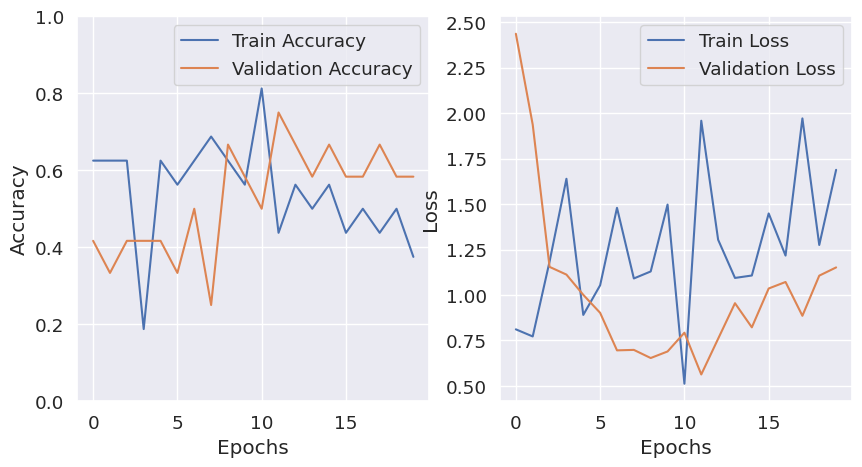

Accuracy train 0.54375
Accuracy de validacion: 0.5249999970197677


In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
import nibabel as nib
import random

class DataGenerator(Sequence):
    def __init__(self, lista_rutas_parkinson, lista_rutas_control, batch_size=4):
        self.lista_rutas = lista_rutas_parkinson + lista_rutas_control
        self.etiquetas = np.concatenate([np.full(len(lista_rutas_parkinson), 1), np.full(len(lista_rutas_control), 0)])
        self.batch_size = batch_size
        self.on_epoch_end()

    def on_epoch_end(self):
        # Se llama al final de cada época para barajar aleatoriamente los datos.
        zipped_data = list(zip(self.lista_rutas, self.etiquetas))
        random.shuffle(zipped_data)
        self.lista_rutas, self.etiquetas = zip(*zipped_data)

    def __len__(self):
        return int(np.ceil(len(self.lista_rutas) / self.batch_size))

    def __getitem__(self, idx):
        batch_rutas = self.lista_rutas[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_etiquetas = self.etiquetas[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Manejo del final de los datos: vuelve a empezar desde el principio
        if len(batch_rutas) < self.batch_size:
            idx = 0
            batch_rutas = self.lista_rutas[idx * self.batch_size:(idx + 1) * self.batch_size]
            batch_etiquetas = self.etiquetas[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_imagenes = [self.cargar_imagen(ruta) for ruta in batch_rutas]
        return np.array(batch_imagenes), np.array(batch_etiquetas)

    def cargar_imagen(self, ruta):
        img = nib.load(ruta)
        datos = img.get_fdata()
        #datos = datos  # Normalización (puedes ajustar según necesites)
        return datos

modelo = tf.keras.models.Sequential()

# Capa convolucional 3D 1
modelo.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(189, 233, 197)))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
modelo.add(tf.keras.layers.Dropout(0.25))  # Capa de Dropout

# Capa convolucional 3D 2
modelo.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa convolucional 3D 3
modelo.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa convolucional 3D 4
modelo.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Aplanar los datos para la capa densa
modelo.add(tf.keras.layers.Flatten())

# Capa densa 1
modelo.add(tf.keras.layers.Dense(512, activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa de salida
modelo.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Resumen del modelo
modelo.summary()

# Crear instancias de generadores para "parkinson" y "control"
generador_combinado_train = DataGenerator(parkinson_train, control_train)
generador_combinado_test = DataGenerator(parkinson_test, control_test)

batch_size = 8

step_por_epoch = ceil((len(parkinson_train) + len(control_train)) / batch_size)
validation_steps = ceil((len(parkinson_test) + len(control_test)) /batch_size)
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Compilar el modelo
opt = tf.keras.optimizers.Adamax()

modelo.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = modelo.fit(generador_combinado_train, steps_per_epoch=step_por_epoch, epochs=20, verbose=1,
                     validation_data=generador_combinado_test, validation_steps=validation_steps)

# Gráficos
fig = plt.figure(figsize=(10, 5))

# Gráfico de Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])  # Establecer límites en el eje y de 0 a 100
ax.legend()

# Gráfico de Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

print("Accuracy train",np.mean(history.history['accuracy']))
print("Accuracy de validacion:",np.mean(history.history['val_accuracy']))


#Hacer el testeo

In [ ]:
# Función para cargar las imágenes
def cargar_imagenes(lista_rutas):
    imagenes = []
    for ruta in lista_rutas:
        img = nib.load(ruta)
        datos = img.get_fdata()
        imagenes.append(datos)
    return imagenes

# Cargar las imágenes para el grupo "parkinson"
imagenes_parkinson = cargar_imagenes(parkinson_test)
etiquetas_parkinson = np.ones(len(imagenes_parkinson))  # Etiqueta 1 para "parkinson"

# Cargar las imágenes para el grupo "control"
imagenes_control = cargar_imagenes(control_test)
etiquetas_control = np.zeros(len(imagenes_control))  # Etiqueta 0 para "control"

# Combina los datos y etiquetas de ambos grupos
conjunto_datos = np.concatenate([imagenes_parkinson, imagenes_control])
print(conjunto_datos.min())
print(conjunto_datos.max())

etiquetas = np.concatenate([etiquetas_parkinson, etiquetas_control])

0.0
16.0


1/1 [==============================] - 1s 724ms/step
Accuracy: 0.6111111111111112
Precision: 0.6111111111111112
Recall: 1.0
F1 Score: 0.7586206896551725
Confusion Matrix:


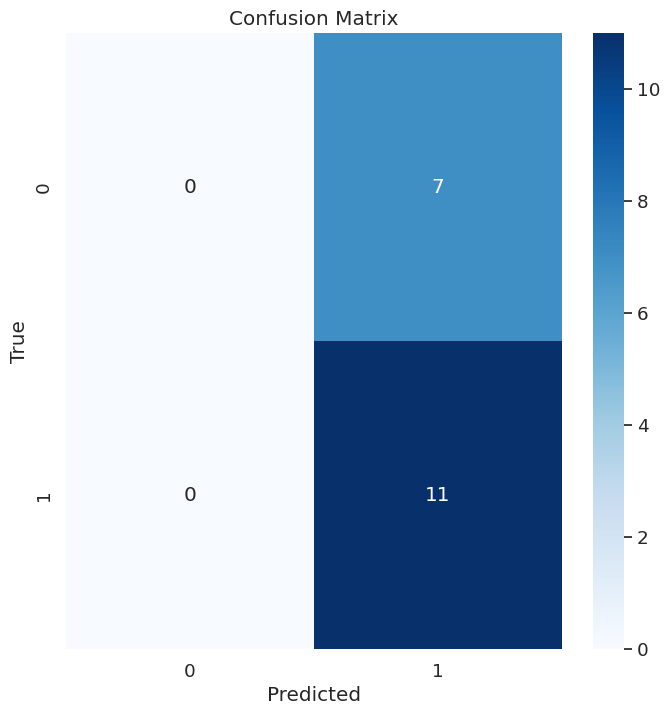

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = modelo.predict(conjunto_datos)
y_pred = (y_pred > 0.5).astype(int)

# Calcular y mostrar métricas
accuracy = accuracy_score(etiquetas, y_pred)
precision = precision_score(etiquetas, y_pred)
recall = recall_score(etiquetas, y_pred)
f1 = f1_score(etiquetas, y_pred)
conf_matrix = confusion_matrix(etiquetas, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Un modelo usando Conv3D

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 187, 231, 195, 4   112       
                             )                                   
                                                                 
 batch_normalization_10 (Ba  (None, 187, 231, 195, 4   16        
 tchNormalization)           )                                   
                                                                 
 max_pooling3d_8 (MaxPoolin  (None, 94, 116, 98, 4)    0         
 g3D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 94, 116, 98, 4)    0         
                                                                 
 conv3d_9 (Conv3D)           (None, 92, 114, 96, 6)    654       
                                                      

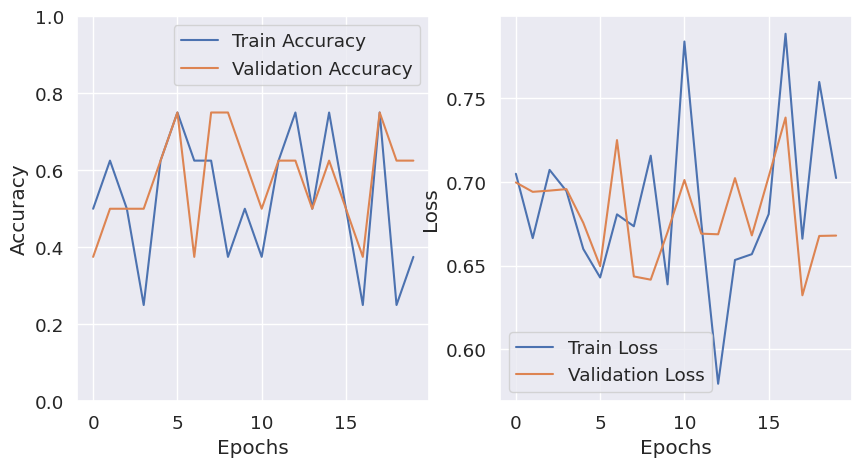

Accuracy train 0.525
Accuracy de validación: 0.575


In [ ]:
class DataGenerator(Sequence):
    def __init__(self, lista_rutas_parkinson, lista_rutas_control, batch_size=4):
        self.lista_rutas = lista_rutas_parkinson + lista_rutas_control
        self.etiquetas = np.concatenate([np.full(len(lista_rutas_parkinson), 1), np.full(len(lista_rutas_control), 0)])
        self.batch_size = batch_size
        self.on_epoch_end()

    def on_epoch_end(self):
        # Se llama al final de cada época para barajar aleatoriamente los datos.
        zipped_data = list(zip(self.lista_rutas, self.etiquetas))
        random.shuffle(zipped_data)
        self.lista_rutas, self.etiquetas = zip(*zipped_data)

    def __len__(self):
        return int(np.ceil(len(self.lista_rutas) / self.batch_size))

    def __getitem__(self, idx):
        batch_rutas = self.lista_rutas[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_etiquetas = self.etiquetas[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Manejo del final de los datos: vuelve a empezar desde el principio
        if len(batch_rutas) < self.batch_size:
            idx = 0
            batch_rutas = self.lista_rutas[idx * self.batch_size:(idx + 1) * self.batch_size]
            batch_etiquetas = self.etiquetas[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_imagenes = [self.cargar_imagen(ruta) for ruta in batch_rutas]
        return np.array(batch_imagenes), np.array(batch_etiquetas)

    def cargar_imagen(self, ruta):
        img = nib.load(ruta)
        datos = img.get_fdata()
        #datos = datos / 255  # Normalización (puedes ajustar según necesites)
        # Añadir una dimensión para convertir a datos de 4D (batch_size, height, width, depth, channels)
        return np.expand_dims(datos, axis=-1)

modelo = tf.keras.models.Sequential()

# Capa convolucional 3D 1
modelo.add(tf.keras.layers.Conv3D(4, (3, 3, 3), activation='relu', input_shape=(189, 233, 197, 1)))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling3D((2, 2, 2), padding='same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa convolucional 3D 2
modelo.add(tf.keras.layers.Conv3D(6, (3, 3, 3), activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling3D((2, 2, 2), padding='same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa convolucional 3D 3
modelo.add(tf.keras.layers.Conv3D(8, (3, 3, 3), activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling3D((2, 2, 2), padding='same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa convolucional 3D 4
modelo.add(tf.keras.layers.Conv3D(12, (3, 3, 3), activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.MaxPooling3D((2, 2, 2), padding='same'))
modelo.add(tf.keras.layers.Dropout(0.25))

# Aplanar los datos para la capa densa
modelo.add(tf.keras.layers.GlobalAveragePooling3D())

# Capa densa 1
modelo.add(tf.keras.layers.Dense(512, activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Dropout(0.25))

# Capa de salida
modelo.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Resumen del modelo
modelo.summary()

# Crear instancias de generadores para "parkinson" y "control"
generador_combinado_train = DataGenerator(parkinson_train, control_train)
generador_combinado_test = DataGenerator(parkinson_test, control_test)

batch_size = 16

step_por_epoch = ceil((len(parkinson_train) + len(control_train)) / batch_size)
validation_steps = ceil((len(parkinson_test) + len(control_test)) / batch_size)

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Compilar el modelo
opt = tf.keras.optimizers.Adamax()
modelo.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = modelo.fit(generador_combinado_train, steps_per_epoch=step_por_epoch, epochs=20, verbose=1,
                     validation_data=generador_combinado_test, validation_steps=validation_steps)

# Gráficos
fig = plt.figure(figsize=(10, 5))

# Gráfico de Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])  # Establecer límites en el eje y de 0 a 1
ax.legend()

# Gráfico de Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

print("Accuracy train", np.mean(history.history['accuracy']))
print("Accuracy de validación:", np.mean(history.history['val_accuracy']))



#Hacer testeo para Conv3D

In [ ]:
# Función para cargar las imágenes
def cargar_imagenes(lista_rutas):
    imagenes = []
    for ruta in lista_rutas:
        img = nib.load(ruta)
        datos = img.get_fdata()
        imagenes.append(datos)
    return np.expand_dims(imagenes, axis=-1)

# Cargar las imágenes para el grupo "parkinson"
imagenes_parkinson = cargar_imagenes(parkinson_test)
etiquetas_parkinson = np.ones(len(imagenes_parkinson))  # Etiqueta 1 para "parkinson"

# Cargar las imágenes para el grupo "control"
imagenes_control = cargar_imagenes(control_test)
etiquetas_control = np.zeros(len(imagenes_control))  # Etiqueta 0 para "control"

# Combina los datos y etiquetas de ambos grupos
conjunto_datos = np.concatenate([imagenes_parkinson, imagenes_control])
etiquetas = np.concatenate([etiquetas_parkinson, etiquetas_control])

1/1 [==============================] - 1s 742ms/step
Accuracy: 0.6111111111111112
Precision: 0.6111111111111112
Recall: 1.0
F1 Score: 0.7586206896551725
Confusion Matrix:


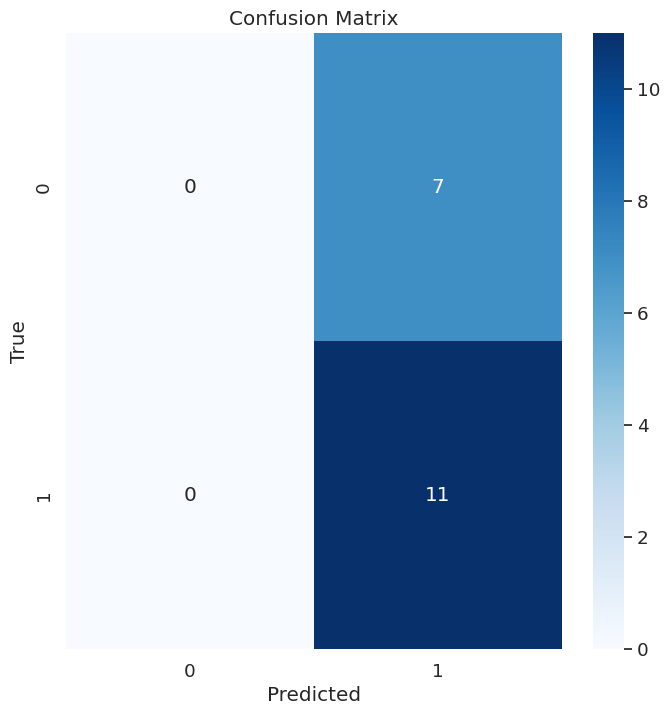

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = modelo.predict(conjunto_datos)
y_pred = (y_pred > 0.5).astype(int)

# Calcular y mostrar métricas
accuracy = accuracy_score(etiquetas, y_pred)
precision = precision_score(etiquetas, y_pred)
recall = recall_score(etiquetas, y_pred)
f1 = f1_score(etiquetas, y_pred)
conf_matrix = confusion_matrix(etiquetas, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Modelo resnet

In [ ]:
import os
import numpy as np
import ants
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def is_image_black(img_array):
    # Verifica si todos los píxeles en la imagen son iguales (negros)
    return np.all(img_array == img_array[0, 0])

def save_slices_as_images(arr: np.ndarray, output_dir: str, prefix: str):
    for i in range(arr.shape[0]):
        slice_img = arr[i, :, :]

        # Verifica si toda la imagen es negra antes de guardarla
        if not is_image_black(slice_img):
            # Normaliza la intensidad entre 0 y 1
            scaler = MinMaxScaler()
            slice_img = scaler.fit_transform(slice_img)

            plt.imshow(slice_img, cmap='gray')
            plt.axis('off')
            plt.savefig(f"{output_dir}/{prefix}_slice_{i}.png", bbox_inches='tight', pad_inches=0.0)
            plt.close()

def process_image_list(image_list, output_dir):
    for file_path in image_list:
        folder_name = os.path.basename(file_path)
        # Dividir el nombre del archivo en secciones
        sections = folder_name.split('_')

        # Obtener la parte del control o parkinson y el mes y el año
        patient_info = sections[0].split('-')  # ['sub', 'control032015']
        patient_type = patient_info[1]  # 'control032015'

        output_subdir = os.path.join(output_dir, patient_type)
        os.makedirs(output_subdir, exist_ok=True)

        img = ants.image_read(file_path, reorient="IAL")
        img_array = img.numpy()

        # Verifica si toda la imagen es negra antes de procesarla
        if not is_image_black(img_array):
            save_slices_as_images(img_array, output_subdir, patient_type)

# Definir listas y directorios
datasets = [control_train, control_test, parkinson_train, parkinson_test]
output_dirs = ["/content/sample_data/Datos_EntrenamientoParcelation/control_train", "/content/sample_data/Datos_EntrenamientoParcelation/control_test",
         "/content/sample_data/Datos_EntrenamientoParcelation/parkinson_train", "/content/sample_data/Datos_EntrenamientoParcelation/parkinson_test"]
# Procesar cada conjunto de datos
for dataset, output_dir in zip(datasets, output_dirs):
    process_image_list(dataset, output_dir)


In [ ]:
import os
import numpy as np
import ants
import matplotlib.pyplot as plt
from skimage import transform

def is_image_black(img_array):
    # Verifica si todos los píxeles en la imagen son iguales (negros)
    return np.all(img_array == img_array[0, 0])

def crop_and_resize(img_array, output_path, x_start, x_end, y_start, y_end, target_size=(224, 224)):
    # Recortar la región de interés
    cropped_img = img_array[x_start:x_end, y_start:y_end]

    # Redimensionar a target_size
    resized_img = transform.resize(cropped_img, target_size)

    # Guardar la imagen final
    plt.imsave(output_path, resized_img, cmap='gray')

def save_slices_as_images(arr: np.ndarray, output_dir: str, prefix: str, target_size=(224, 224)):
    for i in range(arr.shape[0]):
        slice_img = arr[i, :, :]

        # Verificar si toda la imagen es negra antes de guardarla
        if not is_image_black(slice_img):
            # Coordenadas de la región de interés
            x_start, x_end = 70, 135
            y_start, y_end = 60, 135

            # Guardar la región recortada y redimensionada
            output_path = f"{output_dir}/{prefix}_slice_{i}.png"
            crop_and_resize(slice_img, output_path, x_start, x_end, y_start, y_end, target_size)

def process_image_list(image_list, output_dir):
    for file_path in image_list:
        folder_name = os.path.basename(file_path)
        sections = folder_name.split('_')

        patient_info = sections[0].split('-')
        patient_type = patient_info[1]

        output_subdir = os.path.join(output_dir, patient_type)
        os.makedirs(output_subdir, exist_ok=True)

        img = ants.image_read(file_path, reorient="IAL")
        img_array = img.numpy()

        if not is_image_black(img_array):
            # Guardar las imágenes con dimensiones de 224x224
            save_slices_as_images(img_array, output_subdir, patient_type, target_size=(224, 224))

# Definir listas y directorios
datasets = [control_train, control_test, parkinson_train, parkinson_test]
output_dirs = ["/content/sample_data/Datos_EntrenamientoParcelation/control_train", "/content/sample_data/Datos_EntrenamientoParcelation/control_test",
         "/content/sample_data/Datos_EntrenamientoParcelation/parkinson_train", "/content/sample_data/Datos_EntrenamientoParcelation/parkinson_test"]

# Procesar cada conjunto de datos
for dataset, output_dir in zip(datasets, output_dirs):
    process_image_list(dataset, output_dir)


In [ ]:
import os
import numpy as np
import ants
import matplotlib.pyplot as plt
from skimage import transform

def is_image_black(img_array):
    # Verifica si todos los píxeles en la imagen son iguales (negros)
    return np.all(img_array == img_array[0, 0])

def crop_and_resize(img_array, output_path, x_start, x_end, y_start, y_end, target_size=(100, 100)):
    # Recortar la región de interés
    cropped_img = img_array[x_start:x_end, y_start:y_end]

    # Redimensionar a target_size
    resized_img = transform.resize(cropped_img, target_size)

    # Guardar la imagen final
    plt.imsave(output_path, resized_img, cmap='gray')

def save_slices_as_images(arr: np.ndarray, output_dir: str, prefix: str, target_size=(100, 100)):
    for i in range(arr.shape[0]):
        slice_img = arr[i, :, :]

        # Verificar si toda la imagen es negra antes de guardarla
        if not is_image_black(slice_img):
            # Coordenadas de la región de interés
            x_start, x_end = 70, 135
            y_start, y_end = 60, 135

            # Guardar la región recortada y redimensionada
            output_path = f"{output_dir}/{prefix}_slice_{i}.png"
            crop_and_resize(slice_img, output_path, x_start, x_end, y_start, y_end, target_size)

def process_image_list(image_list, output_dir):
    for file_path in image_list:
        folder_name = os.path.basename(file_path)
        sections = folder_name.split('_')

        patient_info = sections[0].split('-')
        patient_type = patient_info[1]

        output_subdir = os.path.join(output_dir, patient_type)
        os.makedirs(output_subdir, exist_ok=True)

        img = ants.image_read(file_path, reorient="IAL")
        img_array = img.numpy()

        if not is_image_black(img_array):
            # Guardar las imágenes con dimensiones de 224x224
            save_slices_as_images(img_array, output_subdir, patient_type, target_size=(100, 100))

# Definir listas y directorios
datasets = [control_train, control_test, parkinson_train, parkinson_test]
output_dirs = ["/content/sample_data/Datos_EntrenamientoParcelation/control_train", "/content/sample_data/Datos_EntrenamientoParcelation/control_test",
         "/content/sample_data/Datos_EntrenamientoParcelation/parkinson_train", "/content/sample_data/Datos_EntrenamientoParcelation/parkinson_test"]

# Procesar cada conjunto de datos
for dataset, output_dir in zip(datasets, output_dirs):
    process_image_list(dataset, output_dir)


In [ ]:
!mv /content/sample_data/Datos_EntrenamientoParcelation /content/drive/MyDrive/neurocon/

# Definir la ruta de la carpeta de origen y destino
ruta_origen = '/content/sample_data/Datos_EntrenamientoParcelation'
ruta_destino = '/content/drive/MyDrive/neurocon'




In [ ]:
!rm -r /content/sample_data/Datos_EntrenamientoParcelation

(224, 224, 4)


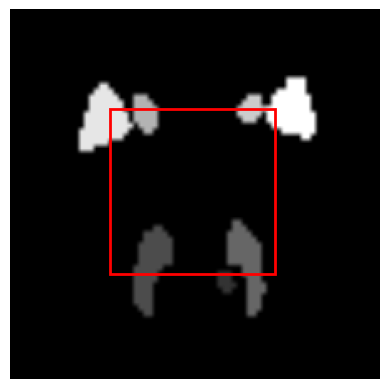

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np

# Ruta de la imagen
ruta_imagen = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation3/control_test/control032015/control032015_slice_60.png'
# Cargar la imagen
imagen = mpimg.imread(ruta_imagen)
print(imagen.shape)
def is_image_black(img_array):
    # Verifica si todos los píxeles en la imagen son iguales (negros)
    return np.all(img_array == img_array[0, 0])

# Coordenadas de la región de interés
x_start, x_end = 60, 160
y_start, y_end = 60, 160

# Mostrar la imagen con el cuadro de recorte
fig, ax = plt.subplots()
ax.imshow(imagen[:,:,1], cmap='gray')

# Añadir un rectángulo para representar la región de interés
rect = patches.Rectangle((y_start, x_start), (y_end - y_start), (x_end - x_start), linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.axis('off')  # Desactivar ejes para una presentación más limpia
plt.show()


In [ ]:
#@title retorna imagenes de el mismo tamaño en 3 canales
# Define las rutas de las carpetas
control_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/control_train'
control_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/control_test'
parkinson_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/parkinson_train'
parkinson_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/parkinson_test'

def leer_imagenes(folder_path):
    imagenes = []
    etiquetas = []

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            path = os.path.join(root, filename)
            img = image.load_img(path)
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            imagenes.append(img)
            etiquetas.append(1 if "parkinson" in folder_path else 0)

    return np.vstack(imagenes), np.array(etiquetas)

# Lee las imágenes y etiquetas de cada carpeta
control_train_imgs, control_train_labels = leer_imagenes(control_train_path)
control_test_imgs, control_test_labels = leer_imagenes(control_test_path)
parkinson_train_imgs, parkinson_train_labels = leer_imagenes(parkinson_train_path)
parkinson_test_imgs, parkinson_test_labels = leer_imagenes(parkinson_test_path)
# Concatena los datos de entrenamiento y prueba para imágenes y etiquetas
x_train = np.concatenate((control_train_imgs, parkinson_train_imgs), axis=0)
y_train = np.concatenate((control_train_labels, parkinson_train_labels), axis=0)

x_test = np.concatenate((control_test_imgs, parkinson_test_imgs), axis=0)
y_test = np.concatenate((control_test_labels, parkinson_test_labels), axis=0)
# Mezcla aleatoriamente los datos de entrenamiento
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)

# Ahora, puedes usar estas matrices en tu red neuronal
# Verifica las dimensiones de los conjuntos de datos combinados
print("Dimensiones del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape, y_test.shape)

# Guarda los arrays en disco
np.save('/content/sample_data/x_train.npy', x_train)
np.save('/content/sample_data/y_train.npy', y_train)
np.save('/content/sample_data/x_test.npy', x_test)
np.save('/content/sample_data/y_test.npy', y_test)


In [ ]:
# Define las rutas de las carpetas
control_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation3/control_train'
control_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation3/control_test'
parkinson_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation3/parkinson_train'
parkinson_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation3/parkinson_test'

def leer_imagenes(folder_path):
    imagenes = []
    etiquetas = []

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            path = os.path.join(root, filename)
            img = image.load_img(path, color_mode="grayscale", target_size=(100, 100))
            img = image.img_to_array(img)
            img = img[:, :, np.newaxis]  # Añade una dimensión para el canal
            imagenes.append(img)
            etiquetas.append(1 if "parkinson" in folder_path else 0)

    return np.array(imagenes), np.array(etiquetas)

# Lee las imágenes y etiquetas de cada carpeta
control_train_imgs, control_train_labels = leer_imagenes(control_train_path)
control_test_imgs, control_test_labels = leer_imagenes(control_test_path)
parkinson_train_imgs, parkinson_train_labels = leer_imagenes(parkinson_train_path)
parkinson_test_imgs, parkinson_test_labels = leer_imagenes(parkinson_test_path)

# Concatena los datos de entrenamiento y prueba para imágenes y etiquetas
x_train = np.concatenate((control_train_imgs, parkinson_train_imgs), axis=0)
y_train = np.concatenate((control_train_labels, parkinson_train_labels), axis=0)

x_test = np.concatenate((control_test_imgs, parkinson_test_imgs), axis=0)
y_test = np.concatenate((control_test_labels, parkinson_test_labels), axis=0)

# Mezcla aleatoriamente los datos de entrenamiento
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)

# Ahora, puedes usar estas matrices en tu red neuronal
# Verifica las dimensiones de los conjuntos de datos combinados
print("Dimensiones del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape, y_test.shape)

# Guarda los arrays en disco
np.save('/content/sample_data/x_train.npy', x_train)
np.save('/content/sample_data/y_train.npy', y_train)
np.save('/content/sample_data/x_test.npy', x_test)
np.save('/content/sample_data/y_test.npy', y_test)

Dimensiones del conjunto de entrenamiento: (1100, 100, 100, 1, 1) (1100,)
Dimensiones del conjunto de prueba: (792, 100, 100, 1, 1) (792,)


In [ ]:
#@title Retorna imagenes de 224,224 en tres canales
import os
import numpy as np
from sklearn.utils import shuffle
from keras.preprocessing import image

# Define las rutas de las carpetas
control_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/control_train'
control_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/control_test'
parkinson_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/parkinson_train'
parkinson_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation1/parkinson_test'

def leer_imagenes(folder_path):
    imagenes = []
    etiquetas = []

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            path = os.path.join(root, filename)
            img = image.load_img(path, target_size=(224,224))  # Ajusta el tamaño según tus necesidades
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)

            imagenes.append(img)
            etiquetas.append(1 if "parkinson" in folder_path else 0)

    return np.vstack(imagenes), np.array(etiquetas)

# Lee las imágenes y etiquetas de cada carpeta
control_train_imgs, control_train_labels = leer_imagenes(control_train_path)
control_test_imgs, control_test_labels = leer_imagenes(control_test_path)
parkinson_train_imgs, parkinson_train_labels = leer_imagenes(parkinson_train_path)
parkinson_test_imgs, parkinson_test_labels = leer_imagenes(parkinson_test_path)
# Concatena los datos de entrenamiento y prueba para imágenes y etiquetas
x_train = np.concatenate((control_train_imgs, parkinson_train_imgs), axis=0)
y_train = np.concatenate((control_train_labels, parkinson_train_labels), axis=0)

x_test = np.concatenate((control_test_imgs, parkinson_test_imgs), axis=0)
y_test = np.concatenate((control_test_labels, parkinson_test_labels), axis=0)
# Mezcla aleatoriamente los datos de entrenamiento
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)

# Ahora, puedes usar estas matrices en tu red neuronal
# Verifica las dimensiones de los conjuntos de datos combinados
print("Dimensiones del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape, y_test.shape)

# Guarda los arrays en disco
np.save('/content/sample_data/x_train.npy', x_train)
np.save('/content/sample_data/y_train.npy', y_train)
np.save('/content/sample_data/x_test.npy', x_test)
np.save('/content/sample_data/y_test.npy', y_test)


Dimensiones del conjunto de entrenamiento: (1883, 224, 224, 3) (1883,)
Dimensiones del conjunto de prueba: (1266, 224, 224, 3) (1266,)


In [ ]:
#@title **Obtencion de slices**
# Define las rutas de las carpetas
control_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation/control_train'
control_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation/control_test'
parkinson_train_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation/parkinson_train'
parkinson_test_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation/parkinson_test'

def leer_imagenes(folder_path):
    imagenes = []
    etiquetas = []

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            path = os.path.join(root, filename)
            img = image.load_img(path)  # Ajusta el tamaño según tus necesidades
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)

            # Verifica si la imagen no es completamente negra
            if not np.all(img == 0):
                imagenes.append(img)
                etiquetas.append(1 if "parkinson" in folder_path else 0)

    return np.vstack(imagenes), np.array(etiquetas)

# Lee las imágenes y etiquetas de cada carpeta
control_train_imgs, control_train_labels = leer_imagenes(control_train_path)
control_test_imgs, control_test_labels = leer_imagenes(control_test_path)
parkinson_train_imgs, parkinson_train_labels = leer_imagenes(parkinson_train_path)
parkinson_test_imgs, parkinson_test_labels = leer_imagenes(parkinson_test_path)
# Concatena los datos de entrenamiento y prueba para imágenes y etiquetas
x_train = np.concatenate((control_train_imgs, parkinson_train_imgs), axis=0)
y_train = np.concatenate((control_train_labels, parkinson_train_labels), axis=0)

x_test = np.concatenate((control_test_imgs, parkinson_test_imgs), axis=0)
y_test = np.concatenate((control_test_labels, parkinson_test_labels), axis=0)
# Mezcla aleatoriamente los datos de entrenamiento
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)

# Ahora, puedes usar estas matrices en tu red neuronal
# Verifica las dimensiones de los conjuntos de datos combinados
print("Dimensiones del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape, y_test.shape)

# Guarda los arrays en disco
np.save('/content/sample_data/x_train.npy', x_train)
np.save('/content/sample_data/y_train.npy', y_train)
np.save('/content/sample_data/x_test.npy', x_test)
np.save('/content/sample_data/y_test.npy', y_test)


Dimensiones del conjunto de entrenamiento: (1100, 100, 100, 3) (1100,)
Dimensiones del conjunto de prueba: (792, 100, 100, 3) (792,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24112513 (91.98 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

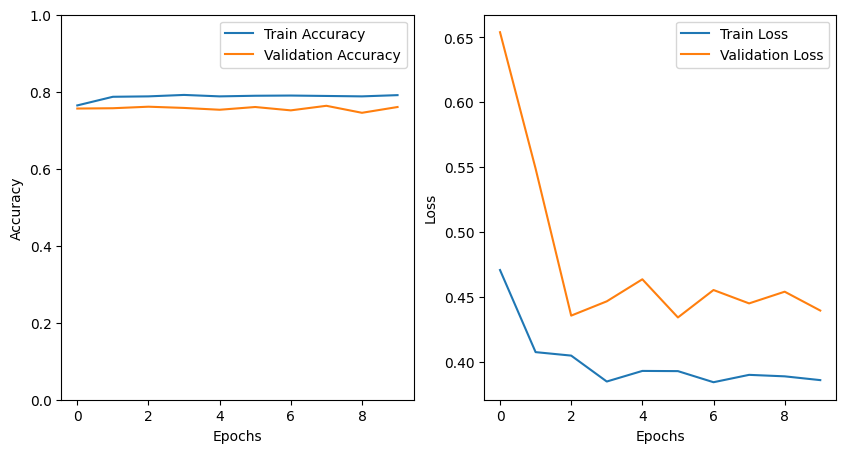

40/40 [==============================] - 7s 113ms/step
Accuracy: 0.7567140600315956
Precision: 0.6111111111111112
Recall: 1.0
F1 Score: 0.7586206896551725
Confusion Matrix:


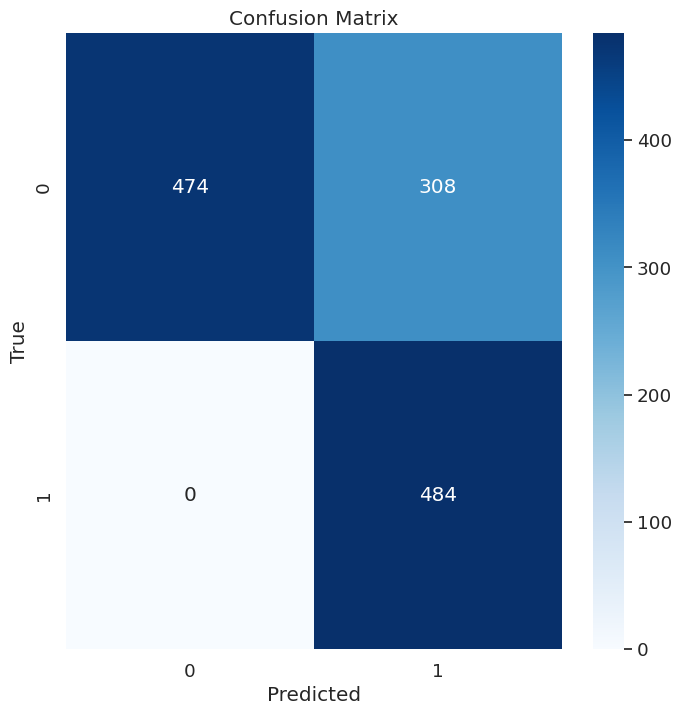

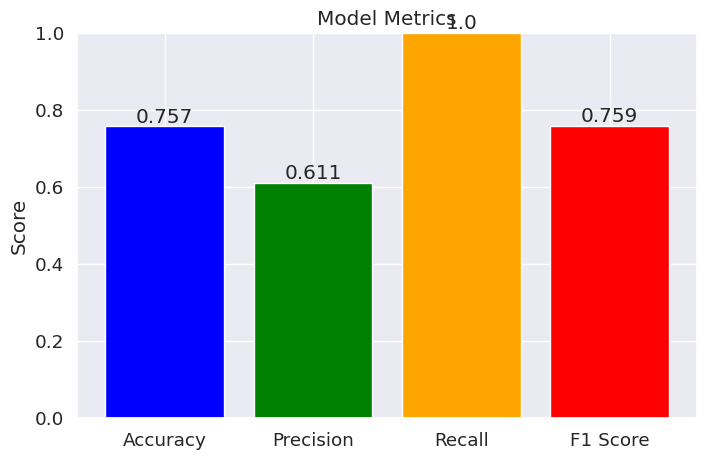

In [ ]:
#@title **Modelo con resnet50**
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping


# Define la arquitectura de la red ResNet
def build_resnet_model(input_shape):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Congelar todas las capas
    base_model.trainable = False

    # Descongelar las últimas unfreeze_layers capas
    for layer in base_model.layers[95:]:
        layer.trainable = True

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Tamaño de entrada de las imágenes
input_shape = (224, 224, 3)

# Construye el modelo ResNet
resnet_model = build_resnet_model(input_shape)

# Compila el modelo
resnet_model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

#resnet_model = load_model('/content/drive/MyDrive/neurocon/Models/model_resnetV1')
#resnet_model.trainable = False

#for layer in resnet_model.layers[85:95]:
#        layer.trainable = True

def batch_generator(x, y, batch_size):
    num_samples = len(x)
    num_batches = num_samples // batch_size

    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for i in range(num_batches):
            batch_indices = indices[i * batch_size: (i + 1) * batch_size]
            x_batch = x[batch_indices]
            y_batch = y[batch_indices]

            yield x_batch, y_batch

# Rutas de los archivos guardados
x_train_path = '/content/sample_data/x_train.npy'
y_train_path = '/content/sample_data/y_train.npy'
x_test_path = '/content/sample_data/x_test.npy'
y_test_path = '/content/sample_data/y_test.npy'

# Cargar los arrays
x_train = np.load(x_train_path)
y_train = np.load(y_train_path)
x_test = np.load(x_test_path)
y_test = np.load(y_test_path)

# Definir parámetros del generador
batch_size = 16
train_generator = batch_generator(x_train, y_train, batch_size)
test_generator = batch_generator(x_test, y_test, batch_size)

# Muestra un resumen del modelo
resnet_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
# Definir una función para LearningRateScheduler
def learning_rate_schedule(epoch):
    initial_lr = 0.2
    decay_factor = 0.009
    decay_epochs = 1

    lr = initial_lr * (decay_factor ** (epoch // decay_epochs))
    return lr

# Crear el objeto LearningRateScheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule)

clases = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=clases, y=y_train)
class_weight_dict = dict(zip(clases, class_weights))
print(class_weight_dict)

# Ahora, puedes usar estos generadores en el método fit_generator de tu modelo
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(x_test) // batch_size,
    shuffle = True,
    callbacks = [early_stopping],
    class_weight=class_weight_dict
)
# Gráficos
fig = plt.figure(figsize=(10, 5))

# Gráfico de Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])  # Establecer límites en el eje y de 0 a 1
ax.legend()

# Gráfico de Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

y_pred = resnet_model.predict(x_test)
# Calcular y mostrar métricas
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Crear un gráfico de barras
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Agregar etiquetas y título
ax.set_ylabel('Score')
ax.set_title('Model Metrics')
ax.set_ylim([0, 1])  # Establecer límites en el eje y de 0 a 1

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()
# Especifica la ruta donde quieres guardar los archivos
ruta_modelo = '/content/drive/MyDrive/neurocon/Models/model_resnetV50'
ruta_modelo_info = '/content/drive/MyDrive/neurocon/Models/model_resnetV1_info.json'

# Crea un diccionario con información adicional
model_info = {
    'other_info': 'Primer modelo usando resnet'
}

# Guarda el diccionario en un archivo JSON en la ruta especificada
with open(ruta_modelo_info, 'w') as json_file:
    json.dump(model_info, json_file)

# Guarda el modelo en formato HDF5 en la ruta especificada
resnet_model.save(ruta_modelo)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 47, 47, 64)        2

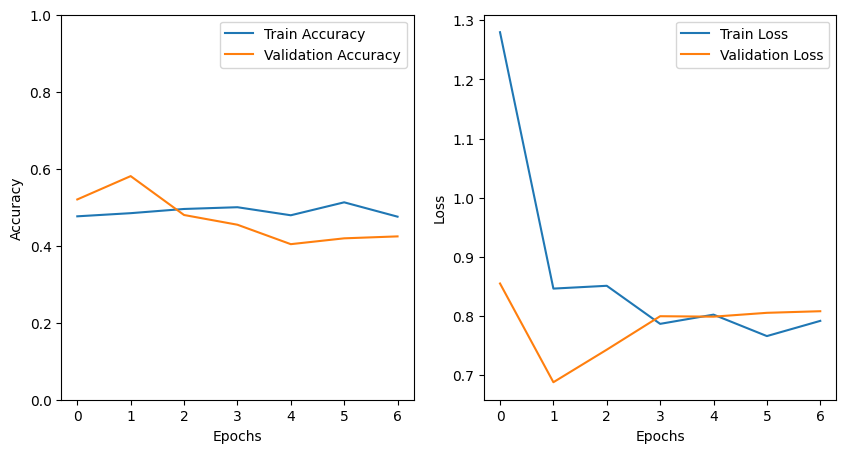

25/25 [==============================] - 0s 5ms/step
Accuracy: 0.5808080808080808
Precision: 0.6111111111111112
Recall: 0.8636363636363636
F1 Score: 0.7157534246575342
Confusion Matrix:


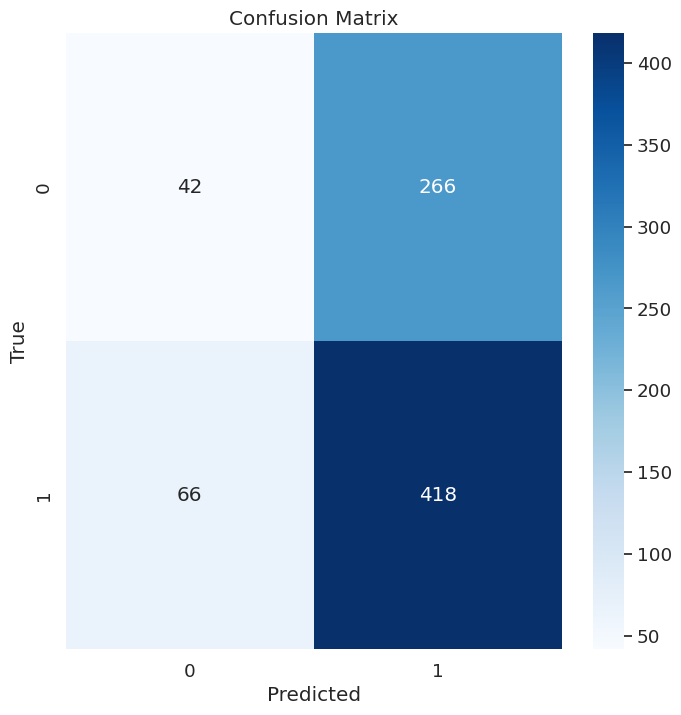

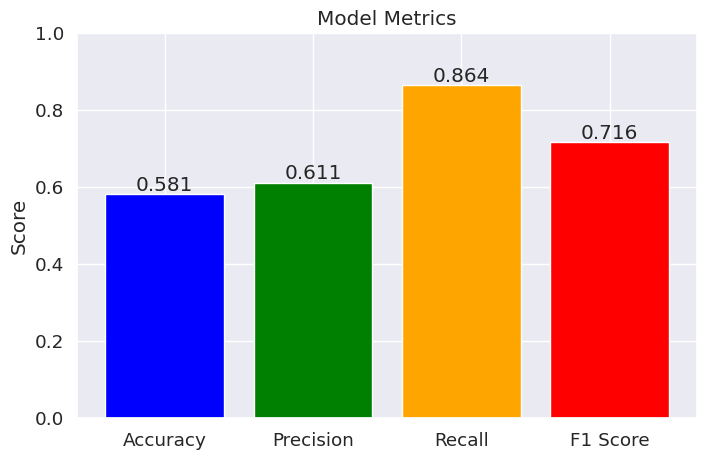

In [ ]:
#@title **Modelo custom**
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping


# Define la arquitectura de la red ResNet
def build_resnet_model(input_shape):
    modelo = tf.keras.models.Sequential()

    # Capa convolucional 3D 1
    modelo.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    modelo.add(tf.keras.layers.BatchNormalization())
    modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
    modelo.add(tf.keras.layers.Dropout(0.25))  # Capa de Dropout

    # Capa convolucional 3D 2
    modelo.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    modelo.add(tf.keras.layers.BatchNormalization())
    modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
    modelo.add(tf.keras.layers.Dropout(0.25))

    # Capa convolucional 3D 3
    modelo.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    modelo.add(tf.keras.layers.BatchNormalization())
    modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
    modelo.add(tf.keras.layers.Dropout(0.25))

    # Capa convolucional 3D 4
    modelo.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
    modelo.add(tf.keras.layers.BatchNormalization())
    modelo.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
    modelo.add(tf.keras.layers.Dropout(0.25))

    # Aplanar los datos para la capa densa
    modelo.add(tf.keras.layers.Flatten())

    # Capa densa 1
    modelo.add(tf.keras.layers.Dense(512, activation='relu'))
    modelo.add(tf.keras.layers.BatchNormalization())
    modelo.add(tf.keras.layers.Dropout(0.25))

    # Capa de salida
    modelo.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return modelo

# Tamaño de entrada de las imágenes
input_shape = (100, 100, 1)

# Construye el modelo ResNet
resnet_model = build_resnet_model(input_shape)

#Compila el modelo
resnet_model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

#resnet_model = load_model('/content/drive/MyDrive/neurocon/Models/model_resnetV5')
#resnet_model.trainable = False

#for layer in resnet_model.layers[55:65]:
#        layer.trainable = True

#for layer in resnet_model.layers[106:]:
#        layer.trainable = True

# Rutas de los archivos guardados
x_train_path = '/content/sample_data/x_train.npy'
y_train_path = '/content/sample_data/y_train.npy'
x_test_path = '/content/sample_data/x_test.npy'
y_test_path = '/content/sample_data/y_test.npy'

# Cargar los arrays
# x_train = np.load(x_train_path)
# y_train = np.load(y_train_path)
# x_test = np.load(x_test_path)
# y_test = np.load(y_test_path)


# Muestra un resumen del modelo
resnet_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Definir una función para LearningRateScheduler
def learning_rate_schedule(epoch):
    initial_lr = 0.2
    decay_factor = 0.009
    decay_epochs = 2

    lr = initial_lr * (decay_factor ** (epoch // decay_epochs))
    return lr

# Crear el objeto LearningRateScheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule)

clases = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=clases, y=y_train)
class_weight_dict = dict(zip(clases, class_weights))
print(class_weight_dict)

# Ahora, puedes usar estos generadores en el método fit_generator de tu modelo
history = resnet_model.fit(x_train, y_train,epochs=100, validation_data=(x_test,y_test), batch_size=32, shuffle = True, callbacks = [early_stopping],
    class_weight=class_weight_dict
)
# Gráficos
fig = plt.figure(figsize=(10, 5))

# Gráfico de Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])  # Establecer límites en el eje y de 0 a 1
ax.legend()

# Gráfico de Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

y_pred = resnet_model.predict(x_test)
# Calcular y mostrar métricas
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Crear un gráfico de barras
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Agregar etiquetas y título
ax.set_ylabel('Score')
ax.set_title('Model Metrics')
ax.set_ylim([0, 1])  # Establecer límites en el eje y de 0 a 1

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()
# Especifica la ruta donde quieres guardar los archivos
ruta_modelo = '/content/drive/MyDrive/neurocon/Models/model_resnetV60'
ruta_modelo_info = '/content/drive/MyDrive/neurocon/Models/model_resnetV1_info.json'

# Crea un diccionario con información adicional
model_info = {
    'other_info': 'Primer modelo usando resnet'
}

# Guarda el diccionario en un archivo JSON en la ruta especificada
with open(ruta_modelo_info, 'w') as json_file:
    json.dump(model_info, json_file)

# Guarda el modelo en formato HDF5 en la ruta especificada
resnet_model.save(ruta_modelo)

(792, 100, 100, 1, 1)
(484, 100, 100, 1, 1)
10/10 [==============================] - 0s 17ms/step


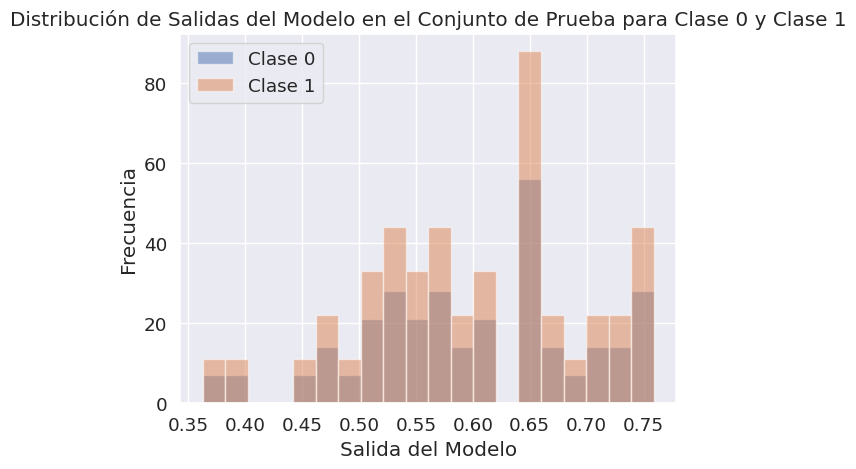

In [ ]:
#@title **Distribucion de probabilidad**
# Rutas de los archivos guardados
#_train_path = '/content/sample_data/x_train.npy'
#y_train_path = '/content/sample_data/y_train.npy'
x_test_path = '/content/sample_data/x_test.npy'
y_test_path = '/content/sample_data/y_test.npy'

# # Cargar los arrays
# # x_train = np.load(x_train_path)
# # y_train = np.load(y_train_path)
x_test = np.load(x_test_path)
y_test = np.load(y_test_path)
# Filtra las instancias clasificadas como clase 1 y 0
x_test_clase_1 = x_test[y_test == 1]
x_test_clase_0 = x_test[y_test == 0]
print(x_test.shape)
print(x_test_clase_1.shape)
#resnet_model = load_model('/content/drive/MyDrive/neurocon/Models/model_resnetV2')

y_pred_1 = resnet_model.predict(x_test_clase_1)
y_pred_0 = resnet_model.predict(x_test_clase_0)

# Visualizar la distribución de probabilidad para cada clase con histogramas
plt.hist(y_pred_0, bins=20, alpha=0.5, label='Clase 0')
plt.hist(y_pred_1, bins=20, alpha=0.5, label='Clase 1')
plt.xlabel('Salida del Modelo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Salidas del Modelo en el Conjunto de Prueba para Clase 0 y Clase 1')
plt.legend()
plt.show()

684
(1, 100, 100, 1, 1)
1/1 [==============================] - 0s 156ms/step


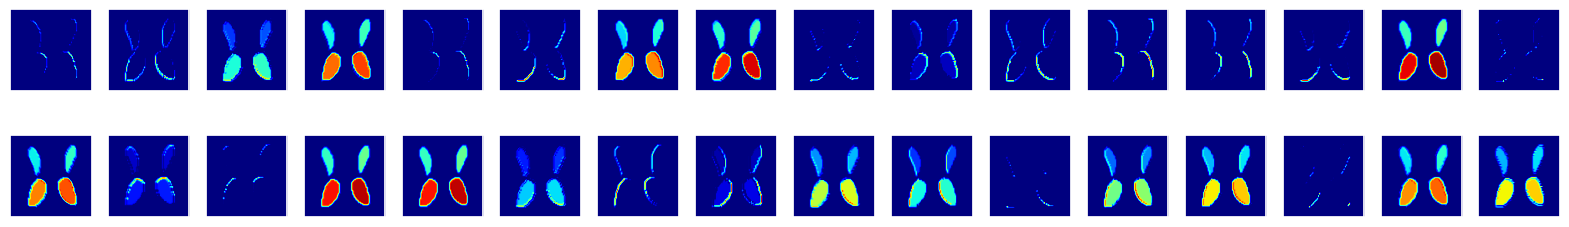

In [ ]:
#@title **Artivaciones de las capas**
# Crear un modelo que genere las salidas de todas las capas
n = random.randint(0,len(x_train)-1)
print(n)
layer_outputs = [layer.output for layer in resnet_model.layers ]

activation_model = tf.keras.models.Model(inputs=resnet_model.input, outputs=layer_outputs)

# Cargar una imagen de prueba
img = x_train[n:n+1]
print(img.shape)
# Cargar y preprocesar una imagen de ejemplo
# img_path = '/content/drive/MyDrive/neurocon/Datos_EntrenamientoParcelation2/control_test/control032015/control032015_slice_67.png'
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=input_shape[:2])
# img_array = tf.keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)
# img_array = tf.keras.applications.vgg19.preprocess_input(img_array)

activation_model = tf.keras.models.Model(inputs=resnet_model.input, outputs=layer_outputs)

activations = activation_model.predict(img)
plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[1][0,:, :, i], cmap='jet')

32 (3, 3, 3, 32)


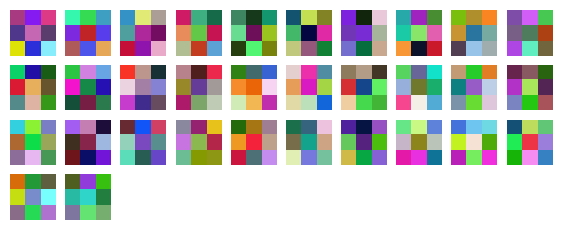

In [ ]:
#@title **Coding** representation basis
w = resnet_model.get_weights()[0]
w = (w-np.min(w))/(np.max(w)-np.min(w))
print(w.shape[-1], w.shape)

plt.figure(figsize=(7,7))
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:,:,:,i])
    plt.axis("off")

In [ ]:
#@title **Coding** Autoencoder CNN implementation
x_train_path = '/content/sample_data/x_train.npy'
y_train_path = '/content/sample_data/y_train.npy'
x_test_path = '/content/sample_data/x_test.npy'
y_test_path = '/content/sample_data/y_test.npy'

# # Cargar los arrays
x_train = np.load(x_train_path)
#y_train = np.load(y_train_path)
x_test = np.load(x_test_path)
#y_test = np.load(y_test_path)

input_img = tf.keras.layers.Input(shape=(100, 100, 1) )
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #  (4, 4, 8)  128-dimensional


x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

autoencoder_cnn.summary()
opt = tf.optimizers.Adamax()
autoencoder_cnn.compile(optimizer=opt, loss='mse')
autoencoder_cnn.fit(x_train, x_train, epochs=20,
                batch_size=256, shuffle=True,
                validation_data=(x_test, x_test), callbacks=[early_stopping])

encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test)
predicted = autoencoder_cnn.predict(x_test)
predicted.shape

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 128)     1280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        1846

(792, 100, 100, 1)

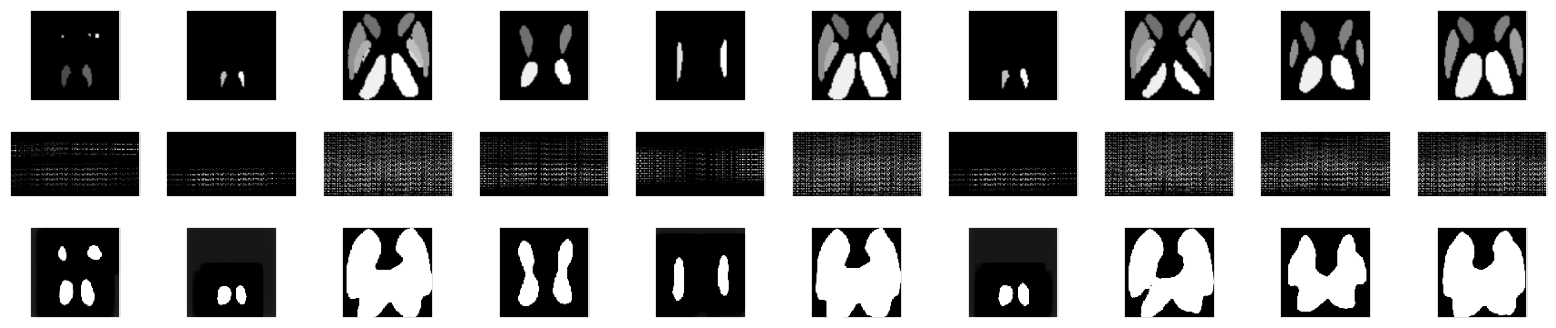

In [ ]:
#@title **Coding** Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(100, 100,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(52,104))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(100, 100,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)